<style>
    h1 {
        padding: 8px 8px;
        background-image: linear-gradient(135deg, #c9f3ff, rgb(131, 218, 255));
        font-weight: 700;
        position: static;
        text-align: center;
        color: #006098;
        font-size: 36px;
    }
    h2 {
        font-weight: 700;
        text-align: center;
        font-style: italic;
        font-size: 24px;
    }
</style>

<div><h1>THỐNG KÊ MÁY TÍNH VÀ ỨNG DỤNG</h1></div>
<div><h2>Bài tập 02</h2></div>

**THÔNG TIN CÁ NHÂN**

- _Họ tên sinh viên:_ **Nguyễn Đặng Đăng Khoa**

- _Mã số sinh viên:_ **21120179**

**KHAI BÁO THƯ VIỆN**

In [1]:
import numpy as np
import pandas as pd
from numpy import random as nrd

import math
import time
from typing import Literal

import collections as clt
import statistics as sts

import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings('ignore')

# **CÂU 1**
Xét thí nghiệm: Bốc ngẫu nhiên có hoàn lại 100 lần từ một hộp bi có 10 bi Đỏ, 8 bi Vàng và 2 bi Xanh.

In [3]:
n_red_marbles = 10
n_yellow_marbles = 8
n_blue_marbles = 2
N_draws = 100

box = np.array(['Đỏ'] * n_red_marbles + ['Vàng'] * n_yellow_marbles + ['Xanh'] * n_blue_marbles,
               dtype='object')

## **Thiết kế thuật toán sinh kết quả cho thí nghiệm trên.**

**_Mã giả (Pseudocode)_**
```
function bốc-ngẫu-nhiên-hoàn-lại():
# input: - hộp-bi: mảng chứa các bi: 10 Đỏ, 8 Vàng, 2 Xanh
         - số-lần-bốc
# returns danh sách các bi được bốc hoàn lại từ hộp bi
số-lượng-bi ← len(hộp-bi)
for 0 to số-lần-bốc - 1:
    chỉ-số-bi ← add(lấy-phần-nguyên(U(0,1) * số-lượng-bi))
return hộp-bi[chỉ-số-bi]
```

**_Cài đặt thuật toán_**

In [4]:
def random_draw_marbles_generator(N_draws:np.uint64=N_draws, marble_box:list=box):
    __n_marbles = len(marble_box)
    __index_lst = np.uint64(np.multiply(nrd.random(N_draws), __n_marbles))
    return np.array(marble_box[__index_lst])

**_Đánh giá_**

- Sử dụng hàm `random` hỗ trở bởi thư viện `numpy`: Hàm này trả về kết quả ngẫu nhiên trong $\left[0;1\right)$. Để kiểm chứng điều này, ta sẽ mô phỏng trong $1,000,000$ lần sinh số ngẫu nhiên của thuật toán trên, ta thấy các số lượng các giá trị `unique` (hay `distinct`) bằng với số lượng viên bi trong hộp. Như vậy, hàm `random` hỗ trở bởi thư viện `numpy` phù hợp để cài đặt sinh số ngẫu nhiên rời rạc trong thuật toán này. 

In [5]:
assert len(box) == len(set(clt.Counter(np.uint64(np.multiply(nrd.random(1_000_000), len(box))))))

- Về xác suất xuất hiện của mỗi loại bi, ta sẽ kiểm chứng nó trong $100,000,000$ lần sinh số ngẫu nhiên.

In [6]:
# Kiểm chứng sinh số nguyên ngẫu nhiên trong đoạn [0,19]
N_test = 100_000_000
test_df = pd.DataFrame.from_dict(clt.Counter(np.uint64(np.multiply(nrd.random(N_test), len(box)))),
                                 orient='index').reset_index()
test_df = test_df.rename(columns={'index':'event', 0:'count'})
test_df['prob'] = np.round(test_df['count'] / N_test, 3)
test_df

,event,count,prob
0,6,5001527,0.05
1,19,5001558,0.05
2,8,4997715,0.05
3,0,4999871,0.05
4,16,5001297,0.05
5,11,5000888,0.05
6,14,5000569,0.05
7,3,4999831,0.05
8,4,4998509,0.05
9,7,4996606,0.05


In [7]:
assert (test_df['prob'] == (1.0 / test_df.shape[0])).all()

Ở lần kiểm chứng này, ta thấy mọi bi (ta không phân biệt bi cùng màu hay khác màu, ta coi mỗi bi đều là khác biệt nhau từng đôi một) đều có xác suất được bốc lên như nhau.

In [8]:
# Quan sát tỷ lệ bốc từng màu bi có trong hộp
N_test = 100_000_000
test_df = pd.DataFrame.from_dict(clt.Counter(random_draw_marbles_generator(N_test)),
                                 orient='index').reset_index()
test_df = test_df.rename(columns={'index':'event', 0:'count'})
test_df['prob per 20'] = np.round(test_df['count'] / N_test * 20, 0)
test_df

,event,count,prob per 20
0,Đỏ,50002687,10.0
1,Vàng,40002207,8.0
2,Xanh,9995106,2.0


In [9]:
assert (test_df[test_df['event'] == 'Đỏ']['prob per 20'] == 10).all()
assert (test_df[test_df['event'] == 'Vàng']['prob per 20'] == 8).all()
assert (test_df[test_df['event'] == 'Xanh']['prob per 20'] == 2).all()

Ở lần kiểm chứng này, ta thấy rằng cứ 20 viên bi được bốc hoàn lại, ta sẽ bốc được số lượng bi từng loại màu trùng khớp với đề bài, cho thấy rằng thuật toán không bias bất kỳ màu bi nào.

- Về thời gian thực thi.

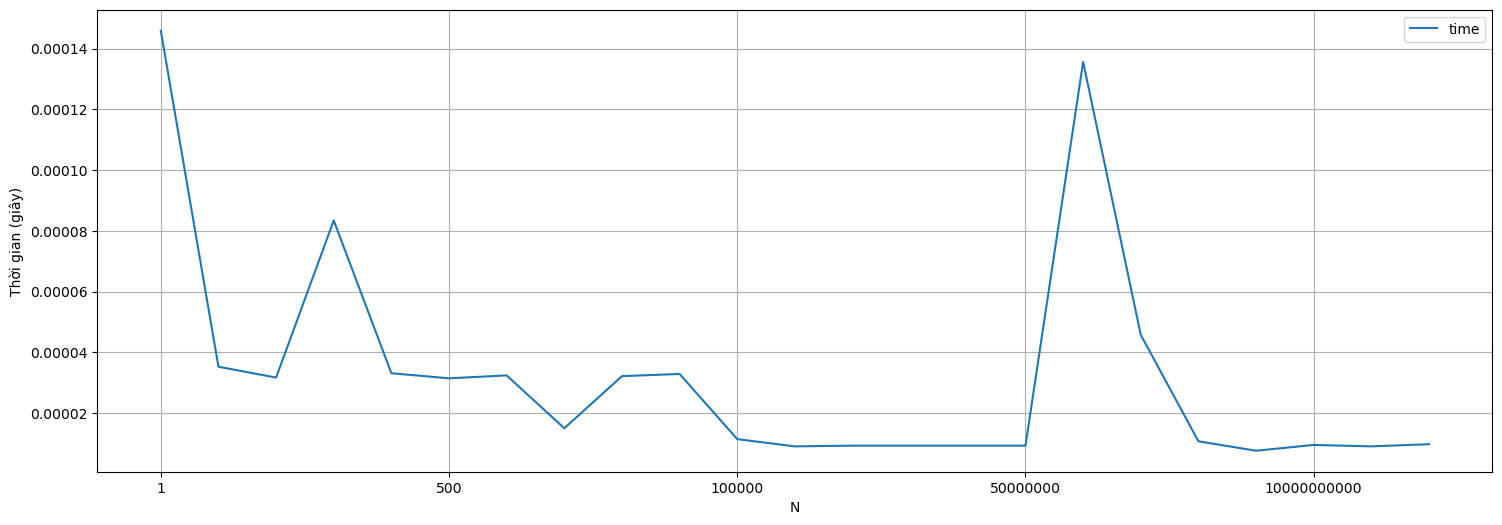

In [10]:
N_test = 100_000_000_000
temp = 1
N_lst = np.array([temp])
while temp < N_test:
    N_lst = np.append(N_lst, temp*5)
    temp *= 10
    N_lst = np.append(N_lst, temp)

time_record_lst = np.array([])
for n_ in N_lst:
    start_time = time.time()
    random_draw_marbles_generator()
    time_record_lst = np.append(time_record_lst, time.time() - start_time)
    
record_df = pd.DataFrame({'time':time_record_lst},
                         index=[str(n_str) for n_str in N_lst])

record_df.plot(kind='line', figsize=(18,6),
               xlabel='N', ylabel='Thời gian (giây)',
               grid=True, legend=True);

Ta thấy thời gian thực thi của thuật toán dù cho $N$ càng lớn thì vẫn xấp xỉ dưới $0.1\text{ ms}$. Điều này lý giải bởi vì thuật toán được hỗ trợ tối đa của thư viện `numpy`.

## **Dùng thuật toán trên ước lượng kì vọng số lần được bi Xanh trong một lần thí nghiệm.**

In [11]:
N_simulation = 10_000

def count_blue_marbles(N_sml:np.uint64=N_simulation, N_drw:np.uint64=N_draws, marble_box:list=box):
    # Khởi tạo một dataframe và định nghĩa index của df này để lưu trữ thông tin màu bi được bốc lên
    count_df = pd.DataFrame(set(marble_box), columns=['index']).set_index('index').rename_axis(index=None)
    
    # Thực hiện mô phỏng và lưu số lượng các bi từng màu được bốc lên match với index
    for index in range(N_sml):
        counter = clt.Counter(random_draw_marbles_generator(N_drw, marble_box))
        count_df[index] = pd.DataFrame.from_dict(counter, orient='index')
    
    # Trả về record số lượng bi xanh từng lần mô phỏng
    return count_df.loc['Xanh']

In [12]:
record_s = count_blue_marbles()

In [13]:
print('Kỳ vọng số lượng bi xanh bốc được trong 100 lần bốc hoàn lại:', record_s.describe().loc['50%'])

Kỳ vọng số lượng bi xanh bốc được trong 100 lần bốc hoàn lại: 10.0


Ngoài ra, có thể đưa `N_simulation` * `N_draws` vào biến cục bộ `N_draws` của hàm `random_draw_marbles_generator()` để tối ưu thời gian thực thi, nhưng cần phải mở rộng khả năng đọc số của nó để không bị tràn số, bởi vì thuật toán em cài có kiểu dữ liệu là `uint64`, cần mở rộng thành `uint128` chẳng hạn.

# **CÂU 2**
Cho $S=\{1,2,...,10\}$. Thiết kế thuật toán sinh tập con ngẫu nhiên gồm $3$ phần tử từ $S$ với điều kiện tập con đó có chứa ít nhất một phần tử từ tập $C=\{1,2,3,4,5\}$. Từ đó ước lượng xác suất tập con sinh được chỉ chứa các phần tử trong $C$.

**_Mã giả (Pseudocode)_**
```
function sinh-tập-con():
# input: - S: Tập không gian mẫu chứa các phần tử cần sinh
         - sl-pt-tập-con: Số lượng phần tử tập con mong muốn sinh
# returns Tập con được sinh gồm có sl-pt-tập-con
for 0 to sl-pt-tập-con - 1:
    vị-trí ← lấy-phần-nguyên(U(0,1) * số-lượng-bi)
    tập-con ← append(S.pop(vị-trí))
return tập-con

function sinh-tập-con-thỏa-điều-kiện():
# input: - S: Tập không gian mẫu chứa các phần tử cần sinh
         - C: Tập điều kiện
         - sl-pt-tập-con: Số lượng phần tử tập con mong muốn sinh
# returns Tập con được sinh thỏa điều kiện
do
    tập-con = sinh-tập-con()
while không tồn tại phần tử của tập con thuộc tập C
return tập-con
```

In [14]:
S = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
C = [1, 2, 3, 4, 5]
num_set = 3

## **Thuật toán sinh tập con**

In [15]:
def generate_discrete_sample(set_:list, num_:np.int64=3):
    """
    Hàm sinh tập con ngẫu nhiên gồm `num_` phần tử.
    
    Tham số:
        set_: Tập hợp các phần tử.
        num_: Số phần tử trong tập con ngẫu nhiên.
    
    Trả về:
        Tập con ngẫu nhiên gồm `num_` phần tử.
    """
    _res = list()
    _set_copy = set_.copy()
    for _ in range(num_):
        if not _set_copy:
            return _res
        _res.append(_set_copy.pop(np.int64(nrd.random(size=1)*len(_set_copy))[0]))
    return _res

In [16]:
def generate_discrete_sample_on_condition(set_:list, des_set_:list, num_:np.int64=3):
    """
    Hàm sinh tập con ngẫu nhiên gồm `num_` phần tử.
    
    Tham số:
        set_: Tập hợp các phần tử.
        num_: Số phần tử trong tập con ngẫu nhiên.
    
    Trả về:
        Tập con ngẫu nhiên gồm `num_` phần tử.
    """
    _res = generate_discrete_sample(set_, num_)
    while any(_elem in des_set_ for _elem in _res) == False:
        _res = generate_discrete_sample(set_, num_)
    return _res

In [17]:
generate_discrete_sample_on_condition(S, C, num_set)

[3, 10, 2]

**_Đánh giá_**

- Về cơ bản, thuật toán giống cách cài đặt sinh số là lấy phần nguyên sinh số ngẫu nhiên.
- Điểm khác, thuật toán được cài đặt sinh số duy nhất (từng lần sinh số đều khác giá trị so với những lần sinh số trước đó), cho nên, nếu tập chứa không gian mẫu $\emptyset$ thì thuật toán không sinh bất kỳ phần tử nào.
- Đánh giá về thời gian thực thi:

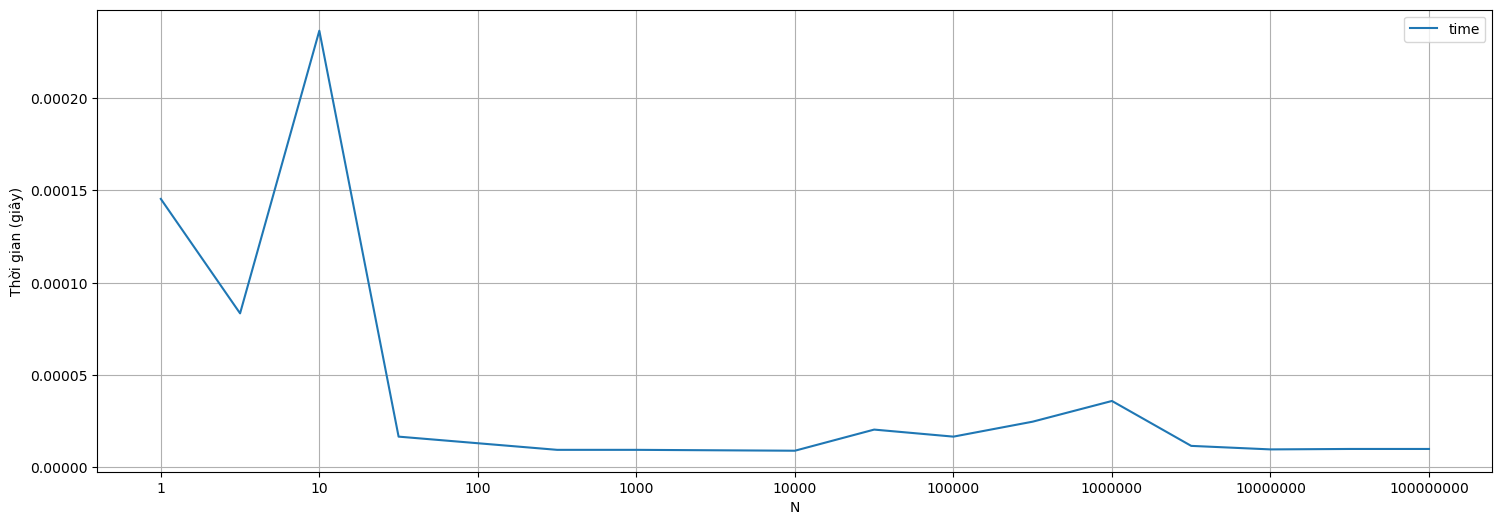

In [18]:
N_test = 100_000_000
temp = 1
N_lst = np.array([temp])
while temp < N_test:
    N_lst = np.append(N_lst, temp*5)
    temp *= 10
    N_lst = np.append(N_lst, temp)

time_record_lst = np.array([])
for n_ in N_lst:
    start_time = time.time()
    generate_discrete_sample_on_condition(S, C, num_set)
    time_record_lst = np.append(time_record_lst, time.time() - start_time)
    
record_df = pd.DataFrame({'time':time_record_lst},
                         index=[str(n_str) for n_str in N_lst])

record_df.plot(kind='line', figsize=(18,6),
               xlabel='N', ylabel='Thời gian (giây)',
               grid=True, legend=True);

Ta thấy khi số lần mô phỏng có tăng lên thì thời gian thực thi vẫn khá nhỏ, xấp xỉ dưới $1\text{ ms}$. Có thể do kích thước tập S khá nhỏ, ta cùng thử tăng kích thước tập S để kiểm chứng:

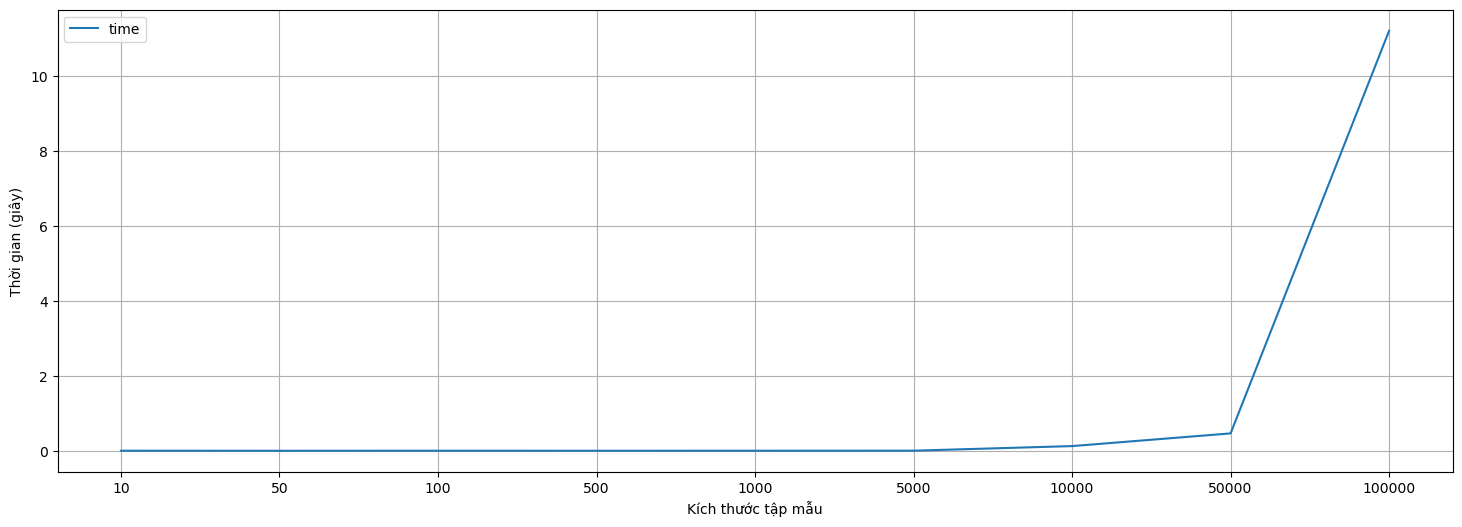

In [19]:
n_set = 10
size_max = 100_000
size_set_lst = np.array([n_set])
while n_set < size_max:
    size_set_lst = np.append(size_set_lst, n_set*5)
    n_set *= 10
    size_set_lst = np.append(size_set_lst, n_set)

time_record_lst = np.array([])
for n_ in size_set_lst:
    start_time = time.time()
    generate_discrete_sample_on_condition(np.arange(1, n_+1).tolist(), C, num_set)
    time_record_lst = np.append(time_record_lst, time.time() - start_time)
    
record_df = pd.DataFrame({'time':time_record_lst},
                         index=[str(n_str) for n_str in size_set_lst])

record_df.plot(kind='line', figsize=(18,6),
               xlabel='Kích thước tập mẫu', ylabel='Thời gian (giây)',
               grid=True, legend=True);

Khi kích thước tập mẫu tăng đáng kể, thời gian thực thi của thuật toán bắt đầu có sự thay đổi rõ rệt.

In [20]:
test_acceptance_rate = list()
for _ in range(100_000):
    test_acceptance_rate.append(any(_elem in C for _elem in generate_discrete_sample(S, num_set)))
print('Tỷ lệ chấp nhận tập con sinh ra thỏa điều kiện:',np.mean(test_acceptance_rate))

Tỷ lệ chấp nhận tập con sinh ra thỏa điều kiện: 0.91652


Ta thấy vẫn có tỷ lệ mẫu không thỏa điều kiện, nhìn chung tỷ lệ được chấp nhận khá cao.

- Về mức độ chấp nhận thuật toán, ta kiểm tra bằng đoạn code sau:

## **Ước tính xác suất tập con sinh chỉ chứa các phần tử thuộc tập $C$.**

In [21]:
def estimate_probability(set_S, set_C, num_sml, num_smp):
    _res = list()
    for _ in range(num_sml):
        _res.append(all(_elem in set_C for _elem in generate_discrete_sample(set_S, num_smp)))
    return np.mean(_res)

Ước tính xác suất:

In [22]:
estimate_probability(S, C, 1000000, 3)

0.083626

# **CÂU 3**
Thiết kế các thuật toán sinh số ngẫu nhiên $X$ có phân phối Poisson cho các trường hợp tham số $\lambda$ là:

In [23]:
def poisson_1(_lambda):
  __k, __p = 0, 1
  while __p >= np.exp(-_lambda):
    __k += 1
    __p *= nrd.random()
  return __k - 1

In [24]:
def poisson_2(_lambda):
  __k, __u, __p = 0, np.divide(nrd.random(),np.exp(-_lambda)), 1
  while __p < __u:
    __k += 1
    __p += (_lambda**__k)*1.0/math.factorial(__k)*1.0
  return __k

## **$\lambda=1$**

In [25]:
lambda_ = 1
N_ = 10_000_000

**_Biều đồ phân phối $Poisson$ với $\lambda=1$ qua $10,000,000$ lần sinh số ngẫu nhiên_**

_Thuật toán `poisson_1()`._

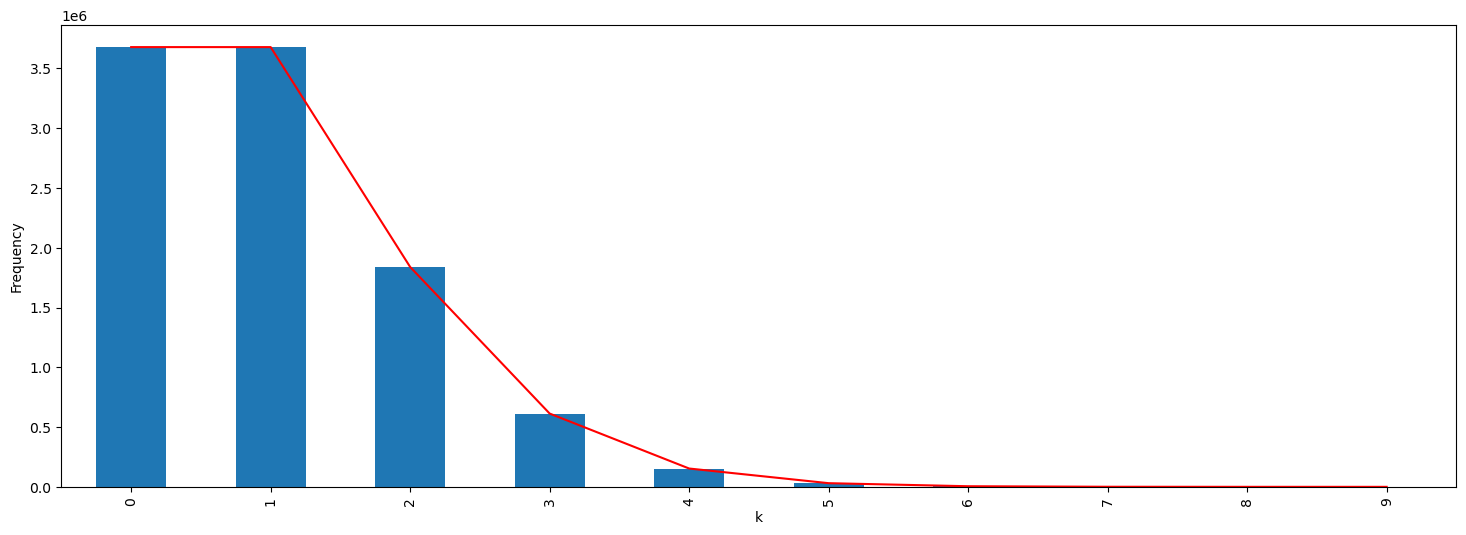

In [26]:
record_df = pd.DataFrame.from_dict(clt.Counter([poisson_1(lambda_) for _ in range(N_)]),
                                   orient='index')
record_df = record_df.sort_index()
x_lst = np.array(record_df.index.to_numpy())
p_lst = [(lambda_**x_)*np.exp(-lambda_)*N_/math.factorial(x_)*1.0 for x_ in x_lst]

ax = record_df.plot(kind='bar', figsize=(18,6),
                    xlabel='k', ylabel='Frequency', legend=False);
ax.plot(x_lst, p_lst, 'red');

_Thuật toán `poisson_2()`._

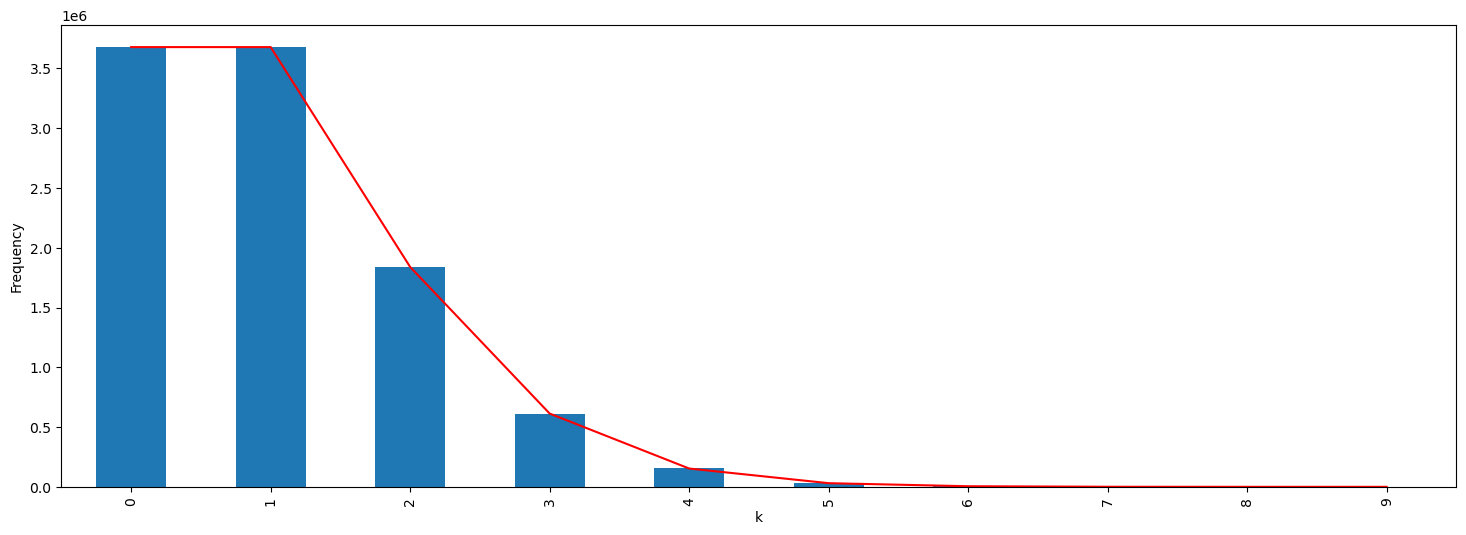

In [27]:
record_df = pd.DataFrame.from_dict(clt.Counter([poisson_2(lambda_) for _ in range(N_)]),
                                   orient='index')
record_df = record_df.sort_index()
x_lst = np.array(record_df.index.to_numpy())
p_lst = [(lambda_**x_)*np.exp(-lambda_)*N_/math.factorial(x_)*1.0 for x_ in x_lst]

ax = record_df.plot(kind='bar', figsize=(18,6),
                    xlabel='k', ylabel='Frequency', legend=False);
ax.plot(x_lst, p_lst, 'red');

**_Đánh giá_**

In [28]:
E_poisson_1 = np.array([])
E_poisson_2 = np.array([])
time_poisson_1 = np.array([])
time_poisson_2 = np.array([])

temp = 1
N_lst = np.array([temp])
while temp < N_:
    N_lst = np.append(N_lst, 5*temp)
    temp *= 10
    N_lst = np.append(N_lst, temp)

In [29]:
for n_ in N_lst:
    start_time = time.time()
    record_1_lst = [poisson_1(lambda_) for _ in range(n_)]
    time_poisson_1 = np.append(time_poisson_1, time.time() - start_time)
    
    start_time = time.time()
    record_2_lst = [poisson_2(lambda_) for _ in range(n_)]
    time_poisson_2 = np.append(time_poisson_2, time.time() - start_time)
    
    E_poisson_1 = np.append(E_poisson_1, sts.mode(record_1_lst))
    E_poisson_2 = np.append(E_poisson_2, sts.mode(record_2_lst))
    
record_df = pd.DataFrame({'E_1':E_poisson_1,
                          'E_2':E_poisson_2,
                          'time_1':time_poisson_1,
                          'time_2':time_poisson_2},
                         index=[str(n_str) for n_str in N_lst])

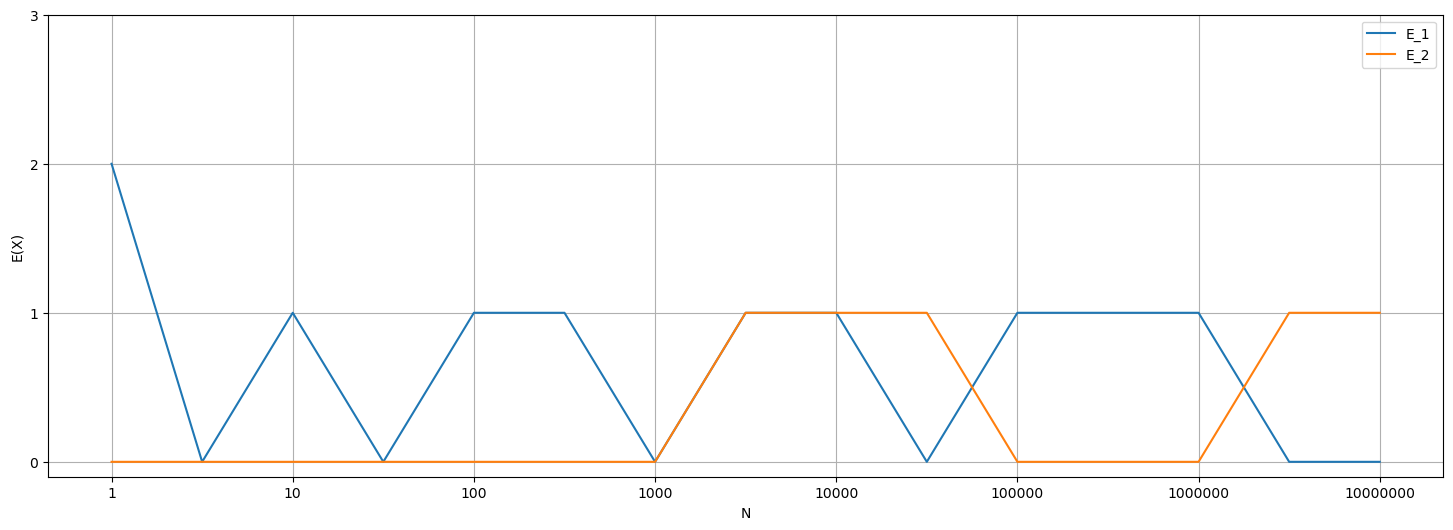

In [30]:
record_df[['E_1', 'E_2']].plot(kind='line', figsize=(18,6),
                               xlabel='N', ylabel='E(X)',
                               yticks=[0,1,2,3], grid=True, legend=True);

Ta thấy kỳ vọng của 2 thuật toán dao động xung quanh giá trị 1, về tính ổn định kỳ vọng còn khá yếu.

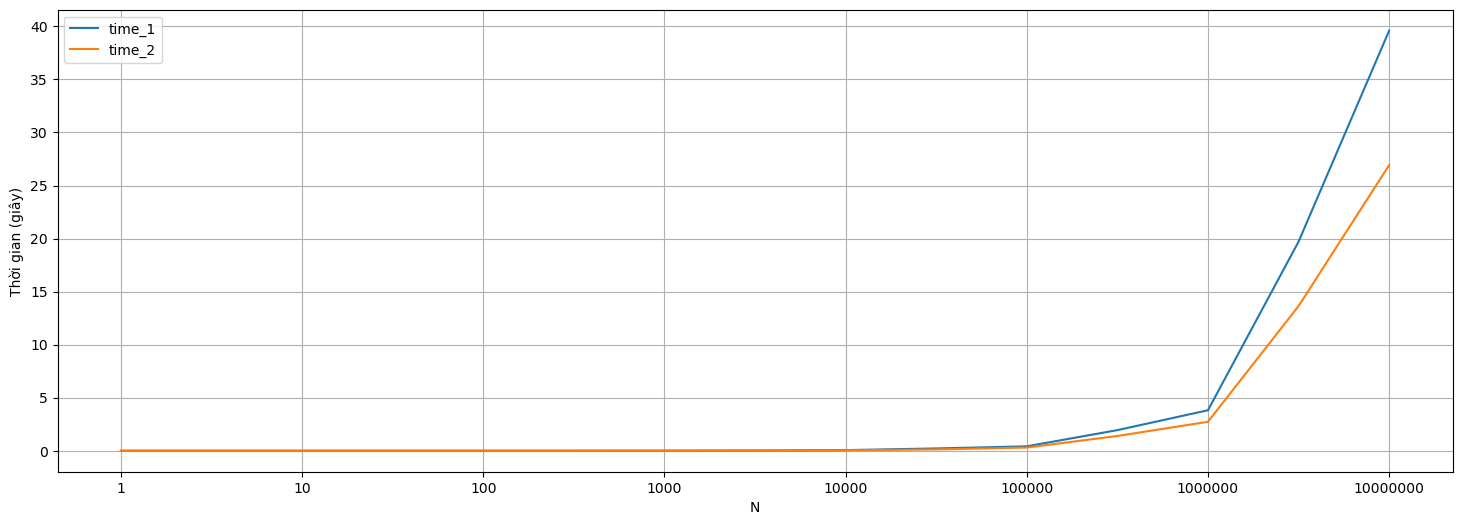

In [31]:
record_df[['time_1', 'time_2']].plot(kind='line', figsize=(18,6),
                                     xlabel='N', ylabel='Thời gian (giây)',
                                     grid=True, legend=True);

Về thời gian chạy, ta thấy thuật toán 2 có thời gian thực thi tốt hơn thuật toán 1.

## **$\lambda=100$**

In [32]:
lambda_ = 100
N_ = 1_000_000

**_Biều đồ phân phối $Poisson$ với $\lambda=100$ qua $1,000,000$ lần sinh số ngẫu nhiên_**

_Thuật toán `poisson_1()`._

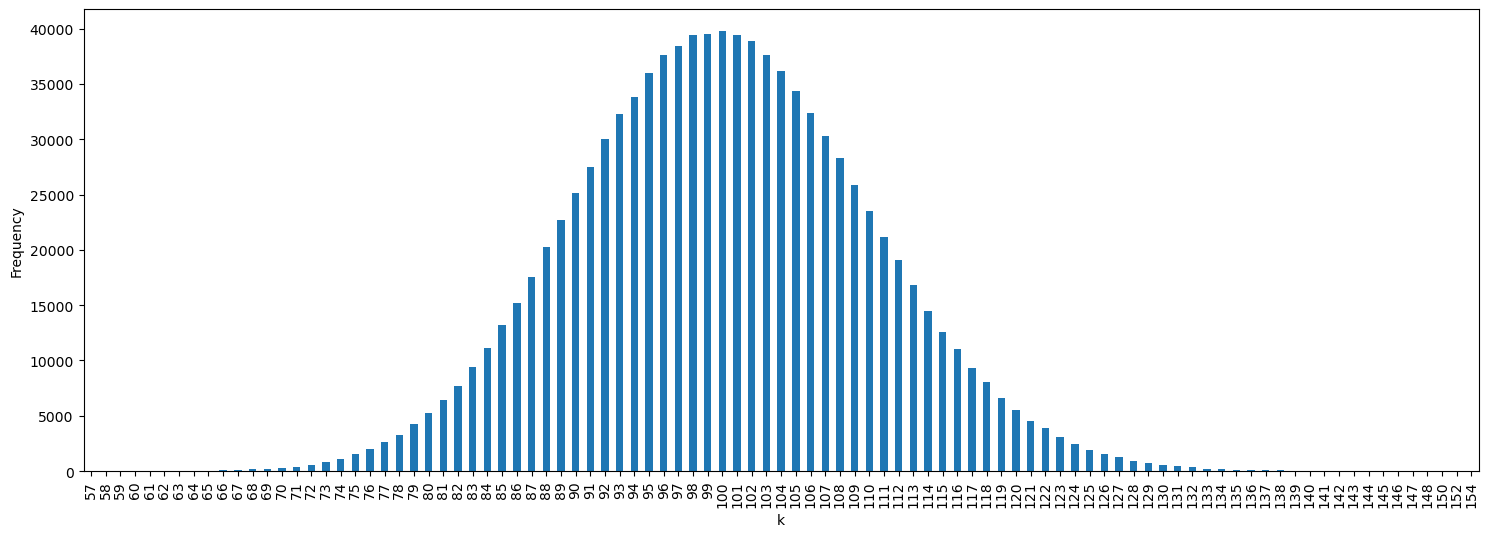

In [33]:
record_df = pd.DataFrame.from_dict(clt.Counter([poisson_1(lambda_) for _ in range(N_)]),
                                   orient='index')
record_df = record_df.sort_index()
x_lst = np.array(record_df.index.to_numpy())
p_lst = [np.divide(math.pow(lambda_, x_)*np.exp(-lambda_)*N_,math.factorial(x_)*1.0) for x_ in x_lst]

record_df.plot(kind='bar', figsize=(18,6),
                    xlabel='k', ylabel='Frequency', legend=False);


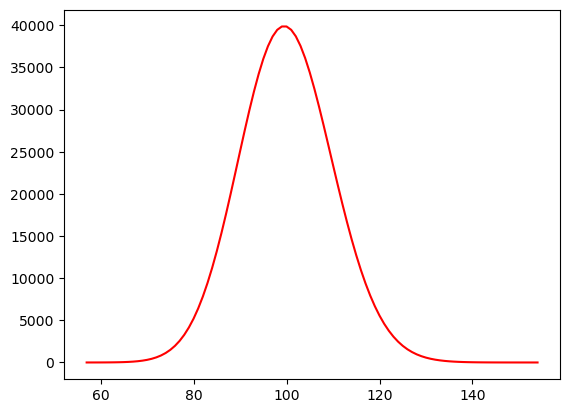

In [34]:
plt.plot(record_df.index.to_numpy(), p_lst, 'red');

_Thuật toán `poisson_2()`._

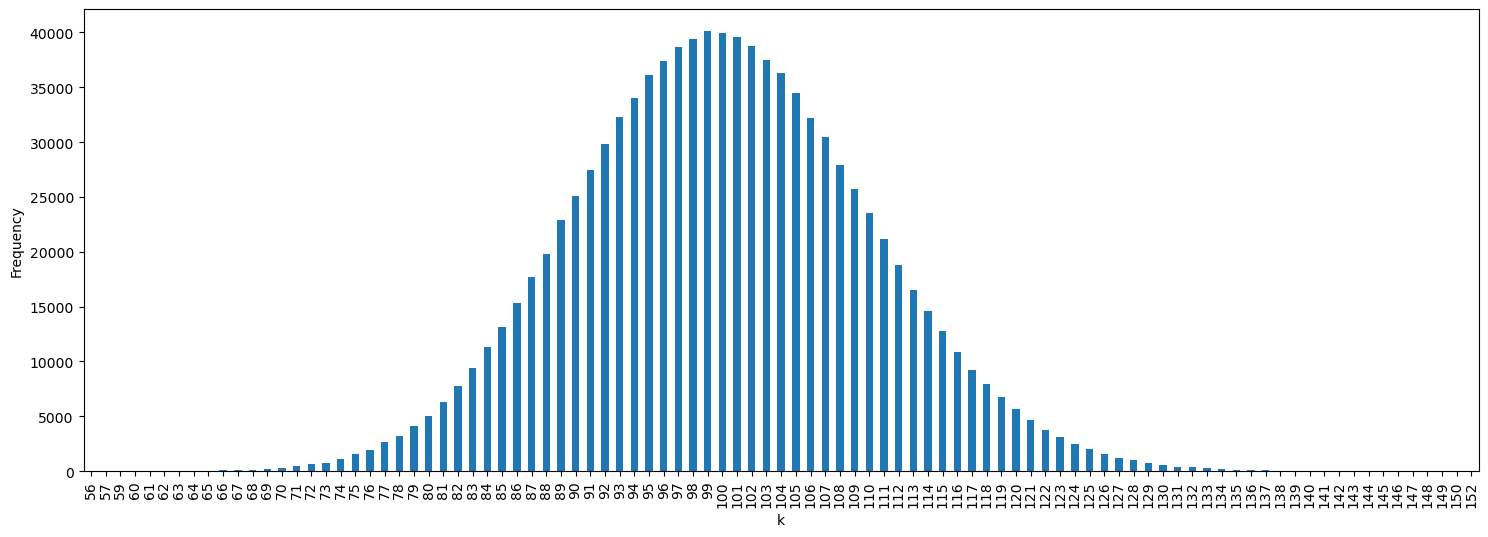

In [35]:
record_df = pd.DataFrame.from_dict(clt.Counter([poisson_2(lambda_) for _ in range(N_)]),
                                   orient='index')
record_df = record_df.sort_index()
x_lst = np.array(record_df.index.to_numpy())
p_lst = [np.divide(math.pow(lambda_, x_)*np.exp(-lambda_)*N_,math.factorial(x_)*1.0) for x_ in x_lst]

record_df.plot(kind='bar', figsize=(18,6),
                    xlabel='k', ylabel='Frequency', legend=False);


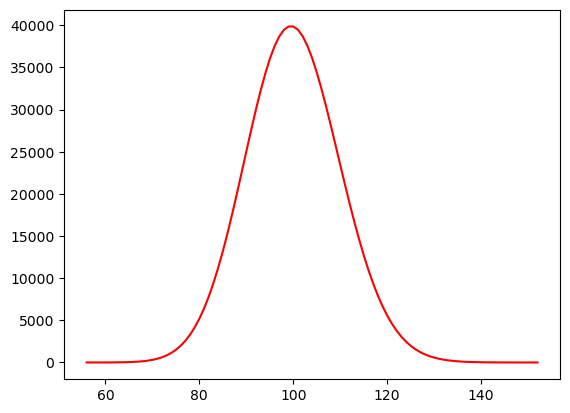

In [36]:
plt.plot(record_df.index.to_numpy(), p_lst, 'red');

**_Đánh giá_**

In [37]:
E_poisson_1 = np.array([])
E_poisson_2 = np.array([])
time_poisson_1 = np.array([])
time_poisson_2 = np.array([])

temp = 1
N_lst = np.array([temp])
while temp < N_:
    N_lst = np.append(N_lst, 5*temp)
    temp *= 10
    N_lst = np.append(N_lst, temp)

In [38]:
for n_ in N_lst:
    start_time = time.time()
    record_1_lst = [poisson_1(lambda_) for _ in range(n_)]
    time_poisson_1 = np.append(time_poisson_1, time.time() - start_time)
    
    start_time = time.time()
    record_2_lst = [poisson_2(lambda_) for _ in range(n_)]
    time_poisson_2 = np.append(time_poisson_2, time.time() - start_time)
    
    E_poisson_1 = np.append(E_poisson_1, sts.mode(record_1_lst))
    E_poisson_2 = np.append(E_poisson_2, sts.mode(record_2_lst))
    
record_df = pd.DataFrame({'E_1':E_poisson_1,
                          'E_2':E_poisson_2,
                          'time_1':time_poisson_1,
                          'time_2':time_poisson_2},
                         index=[str(n_str) for n_str in N_lst])

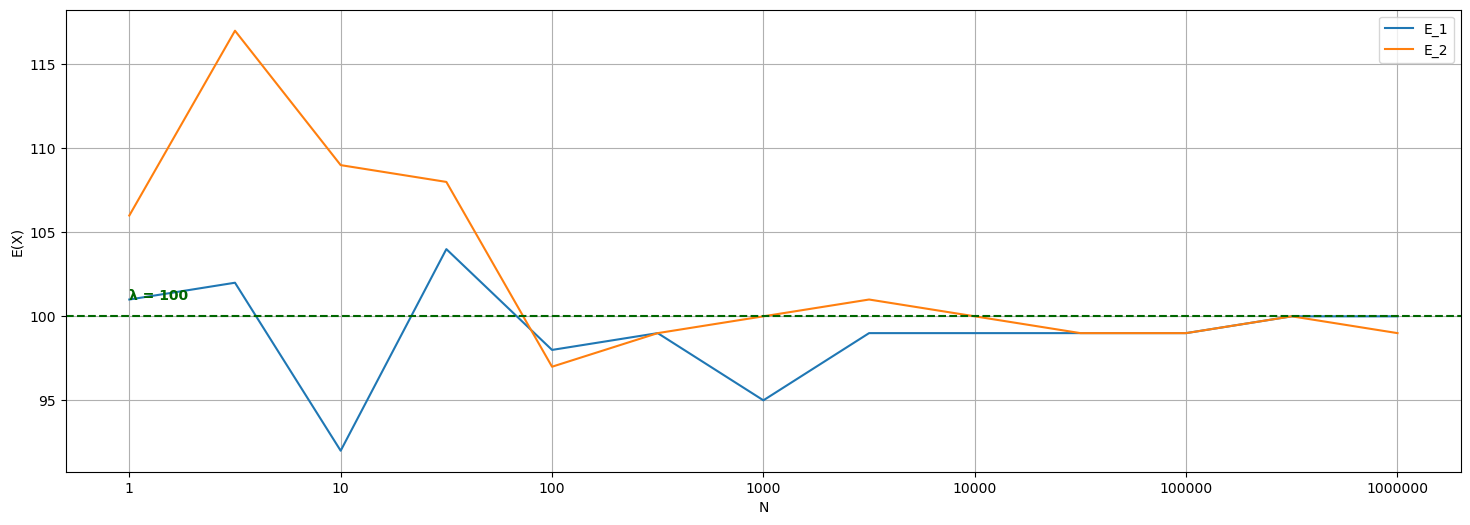

In [39]:
record_df[['E_1', 'E_2']].plot(kind='line', figsize=(18,6),
                               xlabel='N', ylabel='E(X)',
                               grid=True, legend=True);
plt.axhline(y=lambda_, linestyle='--', color='#006600');
plt.annotate("λ = %d" % lambda_, xy=(0, lambda_), xytext=(0, lambda_ + 1),
             color='#006600', weight='bold');

Khi $N$ càng lớn, ta thấy kỳ vọng dao động xấp xỉ giá trị $100$. Nhìn vào biểu đồ, theo hướng $N$ tăng dần, ta thấy khoảng cách kỳ vọng của thuật toán $2$ có biên độ nhỏ hơn khoảng cách kỳ vọng của thuật toán $1$, hay nói cách khác thuật toán $2$ có kỳ vọng xấp xỉ giá trị $100$ hơn thuật toán $1$.

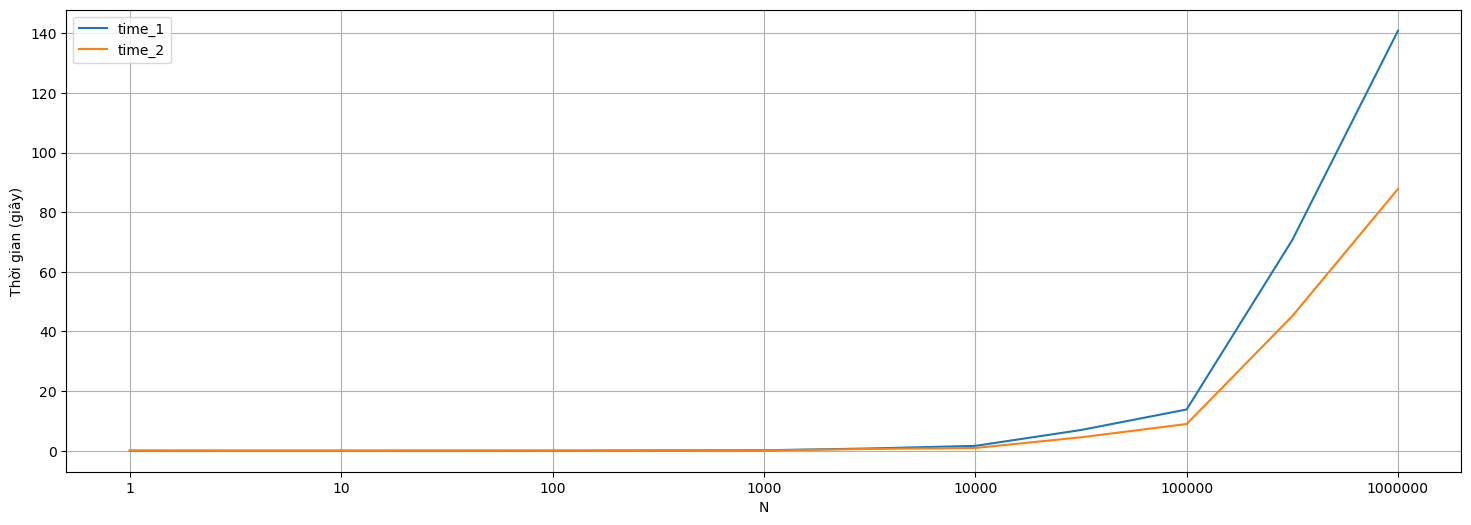

In [40]:
record_df[['time_1', 'time_2']].plot(kind='line', figsize=(18,6),
                                     xlabel='N', ylabel='Thời gian (giây)',
                                     grid=True, legend=True);

Khi $N$ càng tăng dần, ta thấy thuật toán $2$ có thời gian thực thi tốt hơn thuật toán $1$.

**_Đánh giá chung_**

Nhìn chung, về thời gian thực thi cũng như tính hiệu quả mong muốn khi sử dụng phân phối, thuật toán $2$ luôn cho kết quả tốt và ổn định hơn thuật toán $1$.

# **CÂU 4**
Thiết kế thuật toán sinh số ngẫu nhiên $X$ có hàm mật độ xác suất:

$\displaystyle f(x)=
\begin{cases}
e^{2x} & & -\infty < x < 0 \\
e^{-2x} & & 0 \leq x < \infty
\end{cases}$

Tích phân từng phần, ta có:

$\displaystyle F(x)=\int_{-\infty}^{x}f(t)dt=
\begin{cases}
\displaystyle \frac{1}{2}e^{2x} & & -\infty < x < 0 \\
\displaystyle \frac{1}{2}-\frac{1}{2}e^{-2x} & & 0 \leq x < \infty
\end{cases}
\quad,\forall x \in \mathbb{Z}$

Khi đó, ta có hàm ngược $F^{-1}$:

$\displaystyle F^{-1}(u)=
\begin{cases}
\displaystyle \frac{\ln{(2u)}}{2}\\
\displaystyle -\frac{\ln{(1-2u)}}{2}
\end{cases}
\quad,\forall\displaystyle u \in \left[0,\frac{1}{2}\right)\text{ hay }\forall\displaystyle 2u \in [0,1)$

Như vậy, với $2U\sim\mathcal{U}[0,1)$ thì $\displaystyle X=
\begin{cases}
\displaystyle \frac{\ln{(2U)}}{2}\\
\displaystyle -\frac{\ln{(1-2U)}}{2}
\end{cases}$

**_Cài đặt_**

In [41]:
def distribute_4(number_:np.uint64):
    return np.concatenate((np.log(nrd.random(size=number_))/2.0,
                           -np.log(1.0 - nrd.random(size=number_))/2.0))

**_Mô phỏng_**

In [42]:
N_ = 100000000
record_lst = distribute_4(N_)

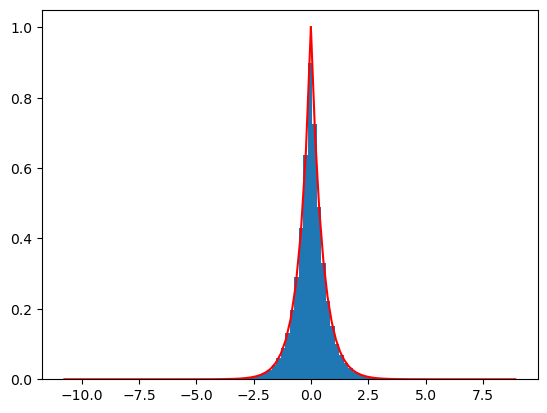

In [43]:
x_neg_lst = np.linspace(np.min(record_lst), 0, 50)
p_neg = [math.exp(2*x_) for x_ in x_neg_lst]
x_pos_lst = np.linspace(0, np.max(record_lst), 50)
p_pos = [math.exp(-2*x_) for x_ in x_pos_lst]
plt.hist(record_lst, bins=100, density=True);
plt.plot(x_neg_lst, p_neg, color='red');
plt.plot(x_pos_lst, p_pos, color='red');

# **CÂU 5**
Cho $X$ là biến ngẫu nhiên có hàm mật độ xác suất:

$f(x)\propto
\begin{cases}
x^2 & -2\leq x < -1\\
1 & -1\leq x < 0\\
1 - x & 0\leq x \leq 1\\
0 & x \notin[-2,1]
\end{cases}$

## **Thiết kế 2 thuật toán khác nhau sinh $X$**

**_Thiết kế dựa trên phương pháp biến đổi ngược_**

Tích phân từng phần, ta có:

$\displaystyle F(x)=\int_{-\infty}^{x}f(t)dt=
\begin{cases}
\displaystyle \frac{x^3 + 8}{3} & -2\leq x < -1\\
x + 1 & -1\leq x < 0\\
\displaystyle x - \frac{x^2}{2} & 0\leq x \leq 1\\
C & x \notin[-2,1]
\end{cases}
\quad,\forall x \in \mathbb{Z}, C \in \mathbb{R}$

Khi đó, ta có hàm ngược $F^{-1}$:

$\displaystyle F^{-1}(u)=
\begin{cases}
\displaystyle \sqrt[3]{3u-8} & \displaystyle 0\leq u < \frac{7}{3}\\
u - 1 & 0\leq u < 1\\
\displaystyle 1 - \sqrt{1-2u} & 0\leq u \leq \displaystyle \frac{1}{2}
\end{cases}$

Như vậy, với $U\sim\mathcal{U}\left[0,\displaystyle \frac{7}{3}\right)$ thì
$\displaystyle X=
\begin{cases}
\displaystyle \sqrt[3]{3U-8} & \displaystyle 0\leq U < \frac{7}{3}\\
U - 1 & 0\leq U < 1\\
\displaystyle 1 - \sqrt{1-2U} & 0\leq U \leq \displaystyle \frac{1}{2}
\end{cases}$

Đặt $\displaystyle Z=\frac{3U}{7}\sim\mathcal{U}[0,1)\Rightarrow U=\frac{7Z}{3}$.

In [44]:
def distribute_5_1(number_:np.uint64):
    _Un = np.divide(np.multiply(7.0,nrd.random(size=number_)), 3.0)
    _U1 = lambda _u : -np.power(-1.0*(3.0*_u-8),1.0/3.0)
    _U2 = lambda _u : [np.subtract(_i, 1) if _i < 1.0 else np.nan for _i in _u]
    _U3 = lambda _u : [1-np.power(1-2.0*_i,.5) if _i <= 0.5 else np.nan for _i in _u]
    _res = np.concatenate((_U1(_Un), _U2(_Un), _U3(_Un)))
    return _res[~np.isnan(_res)]

**_Thiết kế dựa trên phương pháp lấy mẫu loại bỏ theo khuôn_**

Theo đề, ta có $X\sim\mathcal{U}[-2,1]$ và $X$ được chấp nhận với hàm xác suất tỷ lệ với:

$p(X) =
\begin{cases}
X^2 & -2\leq X < -1\\
1 & -1\leq X < 0\\
1 - X & 0\leq X \leq 1\\
\end{cases}$

Khi đó:

$g(X)=
\begin{cases}
1 & x \in[-2,1] \\
0 & x \notin[-2,1]
\end{cases}$

và

$Z(x)=\displaystyle\int
\begin{cases}
x^2 & -2\leq x < -1\\
1 & -1\leq x < 0\\
1 - x & 0\leq x \leq 1\\
\end{cases}
\begin{cases}
1 & x \in[-2,1] \\
0 & x \notin[-2,1]
\end{cases}
dx\\
\displaystyle=\int_{-2}^{-1}{x^2dx} + \int_{-1}^{0}{dx} + \int_{0}^{1}{(1-x)dx}\\
\displaystyle=\frac{7}{3} + 1 + \frac{1}{2} = \frac{23}{6}$

Như vậy $X$ có phân phối $f(X)\propto\displaystyle\frac{6}{23}p(X)g(X)$.

Đặt $U=\displaystyle\frac{X+2}{3}\sim\mathcal{U}[0,1]$, suy ra $X=3U-2$:

In [45]:
g_ = lambda: np.subtract(np.multiply(3,nrd.random(size=1)),2)

Thuật toán `BRS`:

In [46]:
# Algorithm BRS
# Input:
#   N: output sequence length
#   g: sampler for the proposal density
#   p: the acceptance probability
# Output: a tuple (X, T)
#   X: sequence X1, X2, X3, . . . iid with density f
#   T: total number of proposals
def BSR(N, g, p):
    T = 0
    X = []
    i = 0
    while i < N:
        T = T + 1
        Xn = g()
        Un = nrd.random(size=1)
        if Un <= p(Xn):
            i = i + 1
            X.append(Xn)

    return (np.array(X), T)

Khi $X \in [-2,1]$ thì $p(X) \in [0, 4]$. Vì vậy, hàm $p(X)$ sẽ được cài đặt như sau:

In [47]:
p_ = lambda x: np.divide(np.power(x, 2)*1.0,4.0) if (-2 <= x) & (x < -1) else\
                                                 (1.0/4.0 if (-1 <= x) & (x < 0) else\
                                                 (np.divide((1 - x)*1.0, 4.0) if (0 <= x) & (x <= 1) else 0))

# **So sánh 2 thuật toán**

### **_Đánh giá về hiệu quả_**

**_Thuật toán dựa vào phương pháp biến đổi ngược_**

In [48]:
N_ = 10000000
record_lst = distribute_5_1(N_)

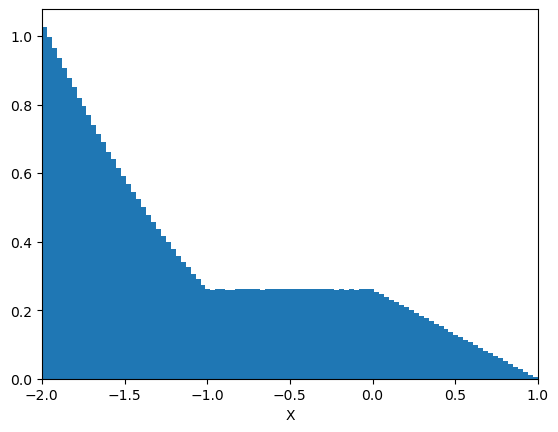

In [49]:
plt.hist(record_lst, bins=100, density=True);
plt.xlim((-2,1));
plt.xlabel('X');

Từ thuật toán ta thấy hàm sinh số ngẫu nhiên $[0,1)$ đều tạo ít nhất một con số nguyên $X$. 

**_Thuật toán dựa vào phương pháp loại bỏ mẫu_**

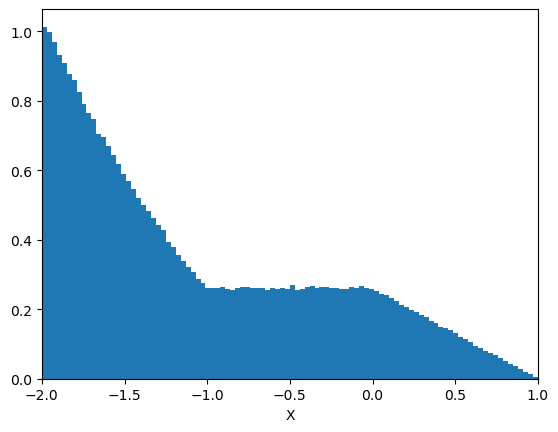

In [50]:
N_ = 1000000
x_, T_ = BSR(N_, g_, p_)

plt.hist(x_, bins=100, density=True);
plt.xlim((-2,1));
plt.xlabel('X');

In [51]:
print("Acceptance rate (Z):", round(N_/T_, 4))

Acceptance rate (Z): 0.3195


Ta thấy tỷ lệ chấp nhận sinh số không cao, có thể dẫn đến việc thời gian thực thi có thể bị chậm.

### **_Đánh giá về thời gian_**

In [52]:
run_time_1 = np.array([])
run_time_2 = np.array([])
N_ = 100_000

temp = 1
N_lst = np.array([temp])
while temp < N_:
    N_lst = np.append(N_lst, 5*temp)
    temp *= 10
    N_lst = np.append(N_lst, temp)

In [53]:
for n_ in N_lst:
    start_time = time.time()
    distribute_5_1(N_)
    run_time_1 = np.append(run_time_1, time.time() - start_time)
    
    start_time = time.time()
    BSR(N_, g_, p_)
    run_time_2 = np.append(run_time_2, time.time() - start_time)
    
record_df = pd.DataFrame({'Biến đổi ngược':run_time_1,
                          'Lấy mẫu loại bỏ':run_time_2},
                         index=[str(n_str) for n_str in N_lst])

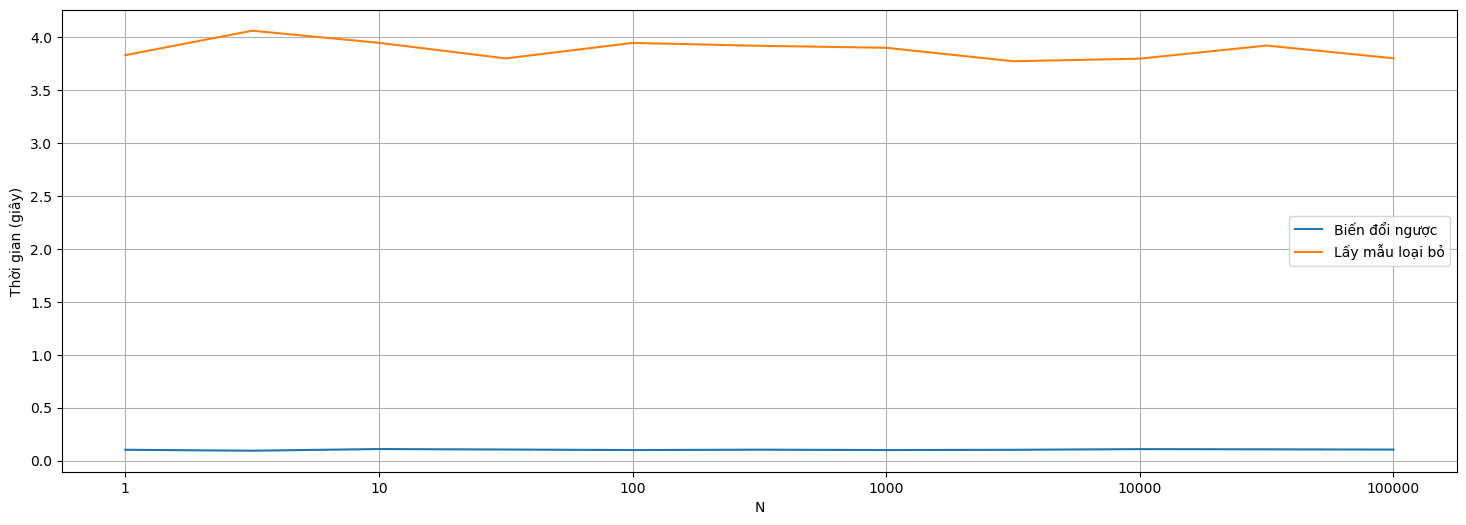

In [54]:
record_df.plot(kind='line', figsize=(18,6),
                                     xlabel='N', ylabel='Thời gian (giây)',
                                     grid=True, legend=True);

Ta thấy thời gian thực thi của thuật toán theo phương pháp loại bỏ tốn nhiều thời gian hơn phương pháp biến đổi ngược.